<a href="https://colab.research.google.com/github/BrightLaw9/Restaurant_Business_Analysis/blob/main/RestaurantAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn.preprocessing import normalize
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd

import seaborn as sn
import IPython


In [ ]:
data = pd.read_json("/content/drive/My Drive/yelp_academic_dataset_business.json", lines=True)
data.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


Text(0.5, 0, 'stars')

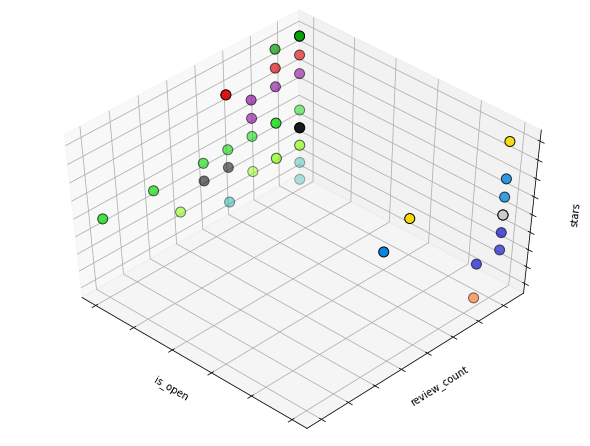

In [ ]:
att = data["attributes"]
deliver = data.loc[att == {"RestaurantsDelivery":"True"}]

x = deliver["review_count"]
y = deliver["stars"]
kmeans = KMeans(n_clusters=12) # change the number here to change the amount of cluster we're looking for
kmeans.fit(deliver[["stars", "is_open"]].to_numpy())
y_kmeans = kmeans.predict(deliver[["stars", "is_open"]].to_numpy())
X = normalize(deliver[["is_open", "review_count", "stars"]].to_numpy(), axis=0, norm='max')
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, 2, 2], elev=48, azim=134)
#ax = Axes3D(fig, rect=[0, 0, 2, 2], elev=3, azim=270)

# Reorder the labels to have colors matching the cluster results
y = np.choose(y_kmeans, [0,1,2,3,4,5,6,7,8,9,10,11]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=100, c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
#fig = plt.figure()
#ax = fig.add_axes([0.1, 0.2,0.8, 0.9])
#ax.scatter(x,y)


ax.set_xlabel('is_open')
ax.set_ylabel('review_count')
ax.set_zlabel('stars')

In [ ]:
att = data["attributes"]
deliver = data.loc[att == {"RestaurantsDelivery":"True"}]

can_del = []
for i in data:
  if i["attributes"] == {"RestaurantsDelivery":"True"}:
    can_del.append(1)
  else:
    can_del.append(0)
can_del

TypeError: ignored

In [ ]:
data.head(50)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."
5,cKyLV5oWZJ2NudWgqs8VZw,Oasis Auto Center - Gilbert,"1720 W Elliot Rd, Ste 105",Gilbert,AZ,85233,33.350399,-111.827142,4.5,38,1,{'BusinessAcceptsCreditCards': 'True'},"Auto Repair, Automotive, Oil Change Stations, ...","{'Monday': '7:0-18:0', 'Tuesday': '7:0-18:0', ..."
6,oiAlXZPIFm2nBCt0DHLu_Q,Green World Cleaners,"6870 S Rainbow Blvd, Ste 117",Las Vegas,NV,89118,36.063977,-115.241463,3.5,81,1,"{'BusinessParking': '{'garage': False, 'street...","Dry Cleaning & Laundry, Local Services, Laundr...","{'Monday': '7:0-19:0', 'Tuesday': '7:0-19:0', ..."
7,ScYkbYNkDgCneBrD9vqhCQ,Junction Tire & Auto Service,6910 E Southern Ave,Mesa,AZ,85209,33.393885,-111.682226,5.0,18,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Auto Repair, Oil Change Stations, Automotive, ...","{'Monday': '7:30-17:0', 'Tuesday': '7:30-17:0'..."
8,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,Champaign,IL,61820,40.110446,-88.233073,4.5,5,1,"{'RestaurantsAttire': 'u'casual'', 'Restaurant...","Ethnic Food, Food Trucks, Specialty Food, Impo...","{'Monday': '11:30-14:30', 'Tuesday': '11:30-14..."
9,EosRKXIGeSWFYWwpkbhNnA,Xtreme Couture,700 Kipling Avenue Etobicoke,Toronto,ON,M8Z 5G3,43.624539,-79.529108,3.0,16,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Martial Arts, Gyms, Fitness & Instruction, Act...","{'Monday': '5:30-23:0', 'Tuesday': '5:30-23:0'..."


In [ ]:
df = pd.DataFrame()

In [ ]:
l = []
for i in data["hours"]:
  if i == None:
    continue
  l.append(i.values())
l

[dict_values(['10:0-18:0', '11:0-20:0', '10:0-18:0', '11:0-20:0', '11:0-20:0', '11:0-20:0', '13:0-18:0']),
 dict_values(['7:0-16:00', '7:0-16:0', '7:0-16:0', '7:0-16:0', '7:0-16:0']),
 dict_values(['0:0-0:00', '9:0-16:0', '9:0-16:0', '9:0-16:0', '9:0-16:0']),
 dict_values(['7:0-18:00', '7:0-18:0', '7:0-18:0', '7:0-18:0', '7:0-18:0', '7:0-15:0']),
 dict_values(['7:0-19:00', '7:0-19:0', '7:0-19:0', '7:0-19:0', '7:0-19:0', '9:0-17:0']),
 dict_values(['7:30-17:00', '7:30-17:0', '7:30-17:0', '7:30-17:0', '7:30-17:0', '7:30-13:0']),
 dict_values(['11:30-14:30', '11:30-14:30', '11:30-14:30', '11:30-14:30', '11:30-14:30']),
 dict_values(['5:30-23:0', '5:30-23:0', '5:30-23:0', '5:30-23:0', '5:30-23:0', '8:0-19:0', '8:0-17:0']),
 dict_values(['7:0-17:0', '7:0-17:0', '7:0-17:0', '7:0-17:0', '7:0-17:0', '7:0-17:0']),
 dict_values(['8:0-17:0', '8:0-17:0', '8:0-17:0', '8:0-17:0', '8:0-17:0']),
 dict_values(['0:0-0:0', '11:0-21:0', '11:0-21:0', '11:0-21:0', '11:0-22:0', '11:0-22:0', '11:0-21:0']),
 d

In [ ]:
a = 0
hours_list = []
result = 0
def calc_day_hrs(day):
   if i[day] == True:
    result += int(i[day][5:7]) - int(i[day][0:2])
l = []
for i in data["hours"]:
  if i == None:
    l.append(None)
    continue
  l.append(list(i.values()))

for a in l:
  for b in range(len(a)):
    a[b]


    # b += 1
#for a in l:
 # print(a[])
  #if a == None:
  #  continue
    # hours_list.append(None)
 # elif i["Monday"][1:2] == ":":
    #i["Monday"] += "0"
      #if i["Monday"] = True:
        #finish = i["Monday"][5:7]
        #start = i["Monday"][0:2]
        #result = int(finish) - int(start)
    #hours_list.append(result)
#hours_list

TypeError: ignored

,hours
0,"{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,None
2,None
3,"{'Monday': '7:0-16:00', 'Tuesday': '7:0-16:0',..."
4,"{'Monday': '0:0-0:00', 'Tuesday': '9:0-16:0', ..."
...,...
209388,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
209389,None
209390,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
209391,"{'Monday': '0:0-0:0', 'Tuesday': '7:0-19:0', '..."


In [ ]:
a = 0
hours_list = []
while a < 70000:
  a += 1
  row = data[(a-1):a]
  test = row["hours"]
  test


In [ ]:
row = data[0:1]
hours = row["hours"]

for i in hours:
  m = i["Monday"].str.split('-')
hours

AttributeError: ignored

In [ ]:
row = data[0:1]
cat = row['categories']
for i in cat:
  if str(i) == "Active Life ":
    print("true")

In [ ]:
#Checking if it is a restaurant
restr = []
count = 0
a = 0
while a < 10000000:
  row = data[a:(a+1)]
  cat = row["categories"]
  for item in cat:
    if item == "Restaurants":
      restr.append(row)
  a += 1;
  print(restr)
#df = pd.DataFrame(restr)
#df.head()

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

KeyboardInterrupt: ignored

In [ ]:
df = restr

NameError: ignored

In [ ]:
att = data["attributes"]
num = []
for i in att:
  count = 0
  for a in str(i):
    count += 1
  num.append(count)

data["Attribute #"] = num
data


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,Attribute #
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'...",252
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None,52
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None,4
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ...",251
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '...",67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209388,9Q0fPWAjUweoFDk0kafuzQ,Nishi Sushi,9750 Weston Road,Vaughan,ON,L4H 2P2,43.838555,-79.559823,4.0,5,0,"{'Ambience': '{'romantic': False, 'intimate': ...","Japanese, Sushi Bars, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",608
209389,PotiAhtDMYMNsJCzV0oLAw,Walmart,3240 Wilkinson Blvd,Charlotte,NC,28208,35.226307,-80.893539,2.0,13,0,"{'RestaurantsPriceRange2': '1', 'BusinessParki...","Department Stores, Food, Mobile Phones, Fashio...",None,175
209390,SYa2j1boLF8DcGVOYfHPcA,Five Guys,7014-590 E Camelback Rd,Scottsdale,AZ,85251,33.504062,-111.929431,3.5,97,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","American (New), Food, Burgers, Restaurants, Fa...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",841
209391,RSSIsgO00OuWQTRoITacpA,Indian Trail Dog Training,,Indian Trail,NC,28079,35.101965,-80.599385,5.0,3,1,None,"Pet Services, Pet Training, Pets","{'Monday': '0:0-0:0', 'Tuesday': '7:0-19:0', '...",4


In [ ]:
data.describe()
favRestr = data.loc[data["name"] == "Congee Queen"]
favScore = favRestr["stars"].mean()
congee = favRestr[0:1]

In [ ]:
state = data["state"]
onRestr = data.loc[state == "ON"]
onRestr
top = onRestr.sort_values(by=["stars", "review_count"], ascending=[False, False])
top3 = top[0:3]
x = top3['review_count']
y = top3['stars']


In [ ]:
restrList = [top3, congee]
restrList

[                   business_id  ...                                              hours
 39603   g6AFW-zY0wDvBl9U82g4zg  ...  {'Monday': '7:30-18:0', 'Tuesday': '7:30-18:0'...
 89610   egLYFnycp8ktxMCvilFdLw  ...  {'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'...
 148903  J9vAdD2dCpFuGsxPIn184w  ...  {'Tuesday': '17:0-21:15', 'Wednesday': '17:0-2...
 
 [3 rows x 14 columns],
                    business_id  ...                                              hours
 100284  ZilzayEdyk70SoI-wruJbg  ...  {'Monday': '10:30-0:0', 'Tuesday': '10:30-0:0'...
 
 [1 rows x 14 columns]]

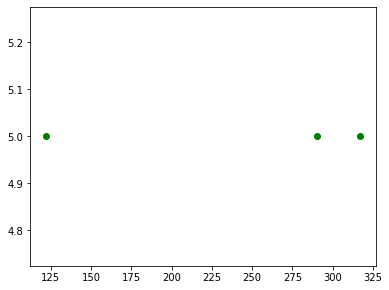

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.2,0.8, 0.9])
ax.scatter(x,y, color="green")